In [1]:
import pandas as pd
from datetime import date
from datetime import timedelta
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from calendar import monthrange

%matplotlib inline 

## Исследование данных 

In [82]:
#reading files
df_customers = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/PROJECT/olist_customers_dataset.csv")
df_orders =pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/PROJECT/olist_orders_dataset.csv")
df_orders_items =pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/PROJECT/olist_order_items_dataset.csv")

In [83]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [84]:
df_customers.shape


(99441, 5)

In [85]:
df_customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [86]:
df_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [87]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [88]:
df_orders.shape

(99441, 8)

In [89]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [90]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [91]:
df_orders_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [92]:
df_orders_items.shape

(112650, 7)

In [93]:
df_orders_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [94]:
df_orders_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

## What is a purchase?

Let's explore what is a purchase

In [95]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [96]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

We have 3 columns with a large number of missing values - the time of order confirmation, the time of transfer to the logistics service, the time of order delivery.
Let's look at them in more detail.
We want to find confirmation that the lack of information in the columns affects the status (there will be no delivered status because there is no time to confirm the payment of the order / time of transfer to the courier / delivery time).

In [97]:
#let's look at the dataframe records, where there is no order confirmation time
df_order_not_approved = df_orders[df_orders.order_approved_at.isna()]
df_order_not_approved.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00


In [98]:
df_order_not_approved.order_status.unique()

array(['canceled', 'delivered', 'created'], dtype=object)

As we can see, where there is no order confirmation time, there are still orders with the status 'delivered'

In [99]:
df_order_not_approved[df_order_not_approved.order_status == 'delivered']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


Due to the lack of order confirmation time, no conclusions can be drawn, because there are orders in the delivered status
This means that we cannot consider an order as a purchase just because there is a time to confirm the payment of the order
(For example, the condition - df_orders.order_approved_at.isna() != True does not meet our conclusions)

In [100]:
#Now let's look at the dataframe records, where there is no transfer time to the courier service
df_order_no_carrier = df_orders[df_orders.order_delivered_carrier_date.isna()]
df_order_no_carrier.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00


In [101]:
df_order_no_carrier.order_status.unique()

array(['invoiced', 'processing', 'unavailable', 'canceled', 'created',
       'approved', 'delivered'], dtype=object)

In [102]:
df_order_no_carrier[df_order_no_carrier.order_status == 'delivered']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaN,2017-11-20 19:44:47,2017-11-14 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00


Due to the absence of the transfer time to the courier service, no conclusions can be drawn, because there are orders with the status delievered
So we can't consider an order as a purchase just because there is a transfer time to the courier service
(For example, the condition - df_orders.order_delivered_carrier_date.isna() != True does not match our conclusions)

In [103]:
##And finally, let's look at the dataframe records, where the order delivery time is missing
df_order_deliever_date = df_orders[df_orders.order_delivered_customer_date.isna()]
df_order_deliever_date.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


In [104]:
df_order_deliever_date.order_status.unique()

array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'created', 'approved'], dtype=object)

In [105]:
df_order_deliever_date[df_order_deliever_date.order_status == 'delivered']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00


Due to the lack of delivery time of the order, no conclusions can be drawn, because there are orders in the delivered status.
This means that we cannot consider an order as a purchase where there is a delivery time for the order
(For example, the condition - df_orders.order_delivered_customer_date.isna() != True does not correspond to our conclusions)

The result is that we have missing values in 3 columns, but with all the missing values, there are orders in the delievered statue, which means that by the absence of these values, conclusions on what can not be considered a purchase can not be made

Now let's look at the statuses, namely, the most interesting one is canceled

In [106]:
df_orders_canceled = df_orders[df_orders.order_status == 'canceled']
df_orders_canceled.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaN,2018-02-23 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00


As we can see, some orders with the cancelled status have both the time of order payment confirmation (order_approved_at) and the time of order transfer to the logistics service (order_delivered_carrier_date), which means that you can cancel the order both after confirmation and after transfer to the logistics service.
It remains to check the delivery time of the order

In [107]:
df_orders_canceled[df_orders_canceled.order_delivered_customer_date.isna() != True]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09 00:00:00
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30 00:00:00
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29 00:00:00
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30 00:00:00
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08 00:00:00


We see that there are orders that have the canceled status, but have the delivery time of the order
From here we can assume two conclusions:
1) This is a glitch in the system (in the data) and either the status was indicated incorrectly, or for some reason the delivery time of the order was recorded
2) Or the order can be canceled after the delivery time of the order (mb by the date of the order is meant delivery to the PVZ, and for example a person did not come for some time and the parcel was sent back to the Online Store, respectively, and the status changed)
Let's take the second conclusion for the truth (referring to the error-free data).

As a result, we can say that:
1) missing data in the dataframe does not give us any accurate information about the purchase (because there are orders in the delievered status)
2) a study of the cancelled status tells us that an order in the cancelled status may have a delivery time of the order, which in turn may indicate that the order can be canceled even after the delivery time of the order


### Then, for the purchase, we will take the fact of placing an order (order_approved_at)

## 1) How many users do we have who have made a purchase only once?

In [108]:
df_orders =pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/PROJECT/olist_orders_dataset.csv")
df_customers = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/PROJECT/olist_customers_dataset.csv")
#To count users who have made a purchase only once, we will connect two tables (users and orders)
df_customer_orders = df_customers.merge(df_orders, on = 'customer_id')
df_customer_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [109]:
#counting the number of unique orders for a unique user IDdata_purchase = df_customer_orders.query('order_approved_at .isna() != True')\
    .groupby('customer_unique_id',as_index = False)\
    .agg({'order_id':'nunique'})\
    .rename({'order_id':'purchases'})
data_purchase.head()

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [110]:
#output the number of users who made one purchase
users_1_item = data_purchase.query("order_id == 1").order_id.sum()
users_1_item

93049

### The answer is 93049 users made a purchase only once.

## 2) How many orders per month on average are not delivered for various reasons (display details for reasons)?

Taking into account the question - "How many orders per month are not delivered on average for various reasons" and the column "order_estimated_delivery_date — promised delivery date", let's assume that one of the reasons may be late delivery (arrived in the wrong month)

Let's determine the reasons why the goods/ may not be delivered

1) Because there is the word month in the wording of the question - so we are looking for the reason inside the month - for example, look at order_estimated_delivery_date — the promised delivery date and order_delivered_customer_date — the delivery time of the order. If the delivery time of the order has exceeded the promised delivery date, then the order will be considered late (we look at it in the context of the month) (order_delivered_customer_date minus order_estimated_delivery_date >= 1) - 'late_delivery'
2) The order can be paid and transferred to the courier service, but not delivered (there is no order_delivered_customer_date, but there is order_delivered_carrier_date and order_approved_at) - 'courier_not_delivered'
3) Not passed to the courier service (there is no order_delivered_carrier_date, but there is order_approved_at) - 'not_on_courier'
4) May not be paid (no order_approved_at) - 'not_paid'

In [111]:
#reread the file
df_orders =pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/PROJECT/olist_orders_dataset.csv")

order_estimated_delivery_date появляется после order_purchase_timestamp

In [112]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [113]:
#convert columns to date format
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])

In [114]:
#convert the necessary columns to date format (year-month)
df_orders['month_of_est_del'] = pd.to_datetime(df_orders.order_estimated_delivery_date.dt.strftime("%Y-%m"))
df_orders['month_of_del'] = pd.to_datetime(df_orders.order_delivered_customer_date.dt.strftime("%Y-%m"))

In [115]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_of_est_del,month_of_del
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-01,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08-01,2018-08-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-09-01,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12-01,2017-12-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-01,2018-02-01


In [116]:
##calculate the difference between the month of the specified delivery and the month of the actual delivery
df_orders['diff_between_months'] = df_orders['month_of_est_del'] - df_orders['month_of_del']

In [117]:
#let's count the number of days in the difference between months
df_orders['diff_between_months'] = df_orders['diff_between_months'].dt.days

In [118]:
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
month_of_est_del                 datetime64[ns]
month_of_del                     datetime64[ns]
diff_between_months                     float64
dtype: object

In [119]:
df_orders = df_orders.fillna(0) 

In [120]:
#the cases we are interested in will be with negative values (because we count by the difference between the assigned delivery and the actual delivery)
##the delay in this case will be cases where the actual delivery is a larger value (respectively < 0)
#found 1980 such cases (late_delivery)
late_delivery = df_orders.query('diff_between_months < 0')


In [121]:
#counting the monthly average (late_delivery)
late_delivery_mean = late_delivery.groupby('month_of_est_del') \
    .agg({'order_id':'count'})\
    .mean()\
    .round(2)

In [122]:
#we consider courier_not_delivered by the condition specified at the beginning.
courier_not_delivered = df_orders[(df_orders.order_delivered_customer_date == 0) & (df_orders.order_delivered_carrier_date != 0) & (df_orders.order_approved_at != 0)]

In [123]:
#counting the monthly average (courier_not_delivered)
courier_not_delivered_mean = courier_not_delivered.groupby('month_of_est_del') \
    .agg({'order_id':'count'})\
    .mean()\
    .round(2)

In [124]:
#counting not_on_courier by the condition specified at the beginning.
not_on_courier = df_orders[(df_orders.order_delivered_carrier_date == 0) & (df_orders.order_approved_at != 0)]

In [125]:
#counting the monthly average (not_on_courier)
not_on_courier_mean = not_on_courier.groupby('month_of_est_del') \
    .agg({'order_id':'count'})\
    .mean()\
    .round(2)

In [126]:
#counting courier_not_delivered by the condition specified at the beginning.
not_paid = df_orders[df_orders.order_approved_at == 0]

In [127]:
#counting the monthly average (not_paid)
not_paid_mean = not_paid.groupby('month_of_est_del') \
    .agg({'order_id':'count'})\
    .mean()\
    .round(2)

In [128]:
#creating a dataframe with all our averages
detalization_of_not_deliverance = pd.DataFrame ([[ late_delivery_mean[0],\
                                                  courier_not_delivered_mean[0],\
                                                  not_on_courier_mean[0],\
                                                  not_paid_mean[0] ]],

columns=['late_delivery', 'courier_not_delivered', 'not_on_courier', 'not_paid'])

In [129]:
detalization_of_not_deliverance

,late_delivery,courier_not_delivered,not_on_courier,not_paid
0,94.29,51.43,71.17,7.27


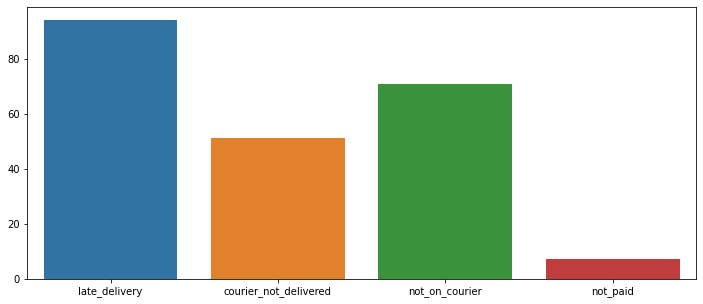

In [130]:
#plot
plt.figure (figsize=(12,5))
sns.barplot(data=detalization_of_not_deliverance)

### Answer: The details for reasons are in the table detalization_of_not_deliverance
#late_delivery - delivered late
#courier_not_delivered - not delivered by courier service
#not_on_courier - not sent to the courier service
#not_paid - not paid
#As we can see, the most common cause is problems with courier services (items late_delivery & courier_not_delivered),
#the rarest case is when the order is created, but not paid by the client (not_paid clause)

## 3) For each product, determine on which day of the week the product is most often purchased.

In [1]:
#In this task, the time of purchase is needed, we will count the time of placing the order for
#the purchase (order_approved_at.isna()!= True)

In [132]:
#let's connect the two tables that interest us
df_orders =pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/PROJECT/olist_orders_dataset.csv")
df_orders_items =pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/PROJECT/olist_order_items_dataset.csv")
df_orders_and_items = df_orders.merge(df_orders_items, on = 'order_id')

In [133]:
#Convert columns to dates
df_orders_and_items['order_estimated_delivery_date'] = pd.to_datetime(df_orders_and_items['order_estimated_delivery_date'])
df_orders_and_items['order_purchase_timestamp'] = pd.to_datetime(df_orders_and_items['order_purchase_timestamp'])
df_orders_and_items['order_approved_at'] = pd.to_datetime(df_orders_and_items['order_approved_at'])
df_orders_and_items['order_delivered_carrier_date'] = pd.to_datetime(df_orders_and_items['order_delivered_carrier_date'])
df_orders_and_items['order_delivered_customer_date'] = pd.to_datetime(df_orders_and_items['order_delivered_customer_date'])

In [134]:
df_orders_and_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [135]:
df_orders_and_items.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
dtype: object

In [136]:
df_orders_and_items.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

In [137]:
#creating the day of the week when the product was purchased (taking the day of the week from the date "order_approved_at")
df_orders_and_items['day_of_week'] = df_orders_and_items.order_approved_at.dt.strftime("%a")

In [138]:
#let's calculate on which day of the week the product is most often bought through fashion (pd.Series.mode)
mode_day_of_week = df_orders_and_items.groupby('product_id',as_index = False)\
    .agg({'day_of_week':pd.Series.mode})
mode_day_of_week.head()

,product_id,day_of_week
0,00066f42aeeb9f3007548bb9d3f33c38,Sun
1,00088930e925c41fd95ebfe695fd2655,Tue
2,0009406fd7479715e4bef61dd91f2462,Fri
3,000b8f95fcb9e0096488278317764d19,"[Fri, Wed]"
4,000d9be29b5207b54e86aa1b1ac54872,Tue


### The answer is in the table above

## 4. How many purchases does each user have on average per week (by month)? Do not forget that there may not be a whole number of weeks inside a month. For example, in November 2021, 4.28 weeks. And this needs to be taken into account inside the metric.

In [139]:
#reread the necessary dataframes
df_customers = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/PROJECT/olist_customers_dataset.csv")
df_orders =pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/PROJECT/olist_orders_dataset.csv")

In [140]:
#merge them
df_4  = df_orders.merge(df_customers, on ='customer_id')

In [141]:
df_4

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [142]:
#transfer to time
df_4['order_approved_at'] = pd.to_datetime(df_4['order_approved_at'])

In [143]:
df_4.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                datetime64[ns]
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
dtype: object

In [144]:
df_4

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [145]:
#we will filter out those values where order_approved_at is unknown
df_4 = df_4[df_4.order_approved_at.isna() != True]

In [146]:
##let's write a function (using the calendar library) to extract the number of days
def dayss (x):
    year=x.year
    month = x.month
    days = monthrange(year, month)[1]
    return days

In [147]:
#using the function to count days in a month for the order_approved_at column
df_4['days_in_month'] = df_4.order_approved_at.apply(dayss)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [148]:
df_4

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,days_in_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,31
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,31
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,30
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,31
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,28
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,31
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,31


In [149]:
##we get the number of weeks by dividing the number of days in a month by the number of days in a week (7) and round it up to 2 digits
df_4['weeks'] = round((df_4['days_in_month'] / 7),2)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [150]:
df_4.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,days_in_month,weeks
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,31,4.43
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31,4.43
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,31,4.43
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,30,4.29
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,28,4.00


In [151]:
#we group by the unique ID of the user, and count the number of orders made, and the total number of weeks for the user
df_4_sum = df_4.groupby('customer_unique_id',as_index = False)\
    .agg({'order_id':'count', 'weeks':'sum'})\

In [152]:
#we find the average by weeks by dividing the number of orders made by the number of weeks and round it up to 4 digits (so that the difference is more visible)
df_4_sum['mean']= round((df_4_sum['order_id'] / df_4_sum['weeks']),4)

In [153]:
df_4_sum.head()

,customer_unique_id,order_id,weeks,mean
0,0000366f3b9a7992bf8c76cfdf3221e2,1,4.43,0.2257
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,4.43,0.2257
2,0000f46a3911fa3c0805444483337064,1,4.43,0.2257
3,0000f6ccb0745a6a4b88665a16c9f078,1,4.43,0.2257
4,0004aac84e0df4da2b147fca70cf8255,1,4.29,0.2331


### The answer is given in the table above

## 5) Conduct a cohort analysis of users. In the period from January to December, identify the cohort with the highest retention for the 3rd month.

What is needed for cohort analysis?
Before conducting a cohort analysis , four parameters are determined:

A sign of cohort formation is an action that unites people into a group: the first time an order is purchased (order_approved_at)
Cohort size — time interval: month (from January to December)
Reporting period — January - December 2017
Analyzed key indicator: Retention Rate

In [198]:
df_customers = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/PROJECT/olist_customers_dataset.csv")
df_orders =pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/PROJECT/olist_orders_dataset.csv")
df_orders_items =pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/PROJECT/olist_order_items_dataset.csv")

In [199]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [200]:
df_kogorta = df_customers.merge(df_orders, on = 'customer_id')

In [201]:
df_kogorta['order_approved_at'] = pd.to_datetime(df_kogorta['order_approved_at'],format = '%Y-%m-%d')

In [202]:
df_kogorta.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [203]:
df_kogorta.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                datetime64[ns]
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object

In [204]:
#creating a dataframe showing the date of the user's first purchase (placing an order)
customers = df_kogorta.groupby('customer_unique_id',as_index = False).agg({'order_approved_at':'min'}).rename(columns = {'order_approved_at':'month_of_first_buy'})

In [205]:
customers.head()

,customer_unique_id,month_of_first_buy
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52


In [207]:
#we will filter out values that are not included in 2017 (according to the condition, it is necessary to build a cohort analysis from January to December, and only 2017 falls under this condition)
customers = customers[(customers.month_of_first_buy > '2016-12') & (customers.month_of_first_buy <'2018-01')]

In [208]:
customers = customers.reset_index()

In [209]:
#let's convert the date to the year - month format
customers['month_of_first_buy'] = customers.month_of_first_buy.dt.strftime('%Y-%m')

In [210]:
customers.head()

,index,customer_unique_id,month_of_first_buy
0,2,0000f46a3911fa3c0805444483337064,2017-03
1,3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
2,4,0004aac84e0df4da2b147fca70cf8255,2017-11
3,8,0005e1862207bf6ccc02e4228effd9a0,2017-03
4,10,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07


In [211]:
customers.month_of_first_buy.unique()

array(['2017-03', '2017-10', '2017-11', '2017-07', '2017-08', '2017-09',
       '2017-12', '2017-01', '2017-04', '2017-06', '2017-02', '2017-05',
       '2016-12'], dtype=object)

In [212]:
#we will filter out values that are not included in 2017 (according to the condition, it is necessary to build a cohort analysis from January to December, and only 2017 falls under this condition)
customers = customers[(customers.month_of_first_buy > '2016-12') & (customers.month_of_first_buy <'2018-01')]

In [213]:
#create a column that shows the date of other orders (not the first one)
df_kogorta['other_orders'] = df_kogorta.order_approved_at.dt.strftime('%Y-%m')

In [214]:
#let's create a table with the month of the first purchase, with the months of other purchases and the user ID
report = customers.merge(df_kogorta[['other_orders','customer_unique_id']], on='customer_unique_id', how='left') 

In [215]:
report.head()

,index,customer_unique_id,month_of_first_buy,other_orders
0,2,0000f46a3911fa3c0805444483337064,2017-03,2017-03
1,3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,2017-10
2,4,0004aac84e0df4da2b147fca70cf8255,2017-11,2017-11
3,8,0005e1862207bf6ccc02e4228effd9a0,2017-03,2017-03
4,10,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07,2017-07


In [216]:
#a table showing the number of unique customers who made their first purchase in month_of_first_buy, and in other_orders

template = report.groupby(['month_of_first_buy','other_orders'],as_index = False)\
    .agg({'customer_unique_id':'nunique'})\
    .rename (columns = {'customer_unique_id':'quantity_of_uniq_clients'})
template.head()

,month_of_first_buy,other_orders,quantity_of_uniq_clients
0,2017-01,2017-01,726
1,2017-01,2017-02,4
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3


In [217]:
#number of purchases in 1 month
first_month_purchases = report.groupby('month_of_first_buy',as_index = False)\
    .agg({'customer_unique_id':'nunique'})\
    .rename(columns ={'customer_unique_id':'unique_customers'})

In [218]:
first_month_purchases.head()

,month_of_first_buy,unique_customers
0,2017-01,726
1,2017-02,1736
2,2017-03,2643
3,2017-04,2323
4,2017-05,3592


In [219]:
final_table = template.merge(first_month_purchases, on = 'month_of_first_buy', how = 'left')

In [220]:
#counting retention rate
final_table['RR'] = round((final_table['quantity_of_uniq_clients'] / final_table['unique_customers'] * 100),2)

In [221]:
#we will remove purchases from other months that fell in 2018
final_table = final_table[final_table.other_orders <'2018-01']

In [222]:
final_table.head()

,month_of_first_buy,other_orders,quantity_of_uniq_clients,unique_customers,RR
0,2017-01,2017-01,726,726,100.00
1,2017-01,2017-02,4,726,0.55
2,2017-01,2017-03,2,726,0.28
3,2017-01,2017-04,1,726,0.14
4,2017-01,2017-05,3,726,0.41


In [223]:
#using the pivot function, rotate the table
retention = final_table.pivot(index = 'month_of_first_buy', columns = 'other_orders', values = 'RR')

In [224]:
retention

other_orders,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
month_of_first_buy,,,,,,,,,,,,
2017-01,100.0,0.55,0.28,0.14,0.41,0.14,0.55,0.14,0.14,NaN,0.28,0.28
2017-02,NaN,100.00,0.23,0.23,0.17,0.40,0.12,0.23,0.17,0.12,0.23,0.12
2017-03,NaN,NaN,100.00,0.49,0.34,0.34,0.34,0.15,0.15,0.30,0.30,0.11
2017-04,NaN,NaN,NaN,100.00,0.60,0.22,0.17,0.30,0.26,0.34,0.26,0.34
2017-05,NaN,NaN,NaN,NaN,100.00,0.53,0.50,0.39,0.31,0.33,0.42,0.17
2017-06,NaN,NaN,NaN,NaN,NaN,100.00,0.48,0.35,0.41,0.25,0.35,0.38
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.52,0.34,0.21,0.34,0.18
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.67,0.36,0.26,0.38
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.65,0.48,0.34


### Answer - the highest RR for 3 months (0.41) is observed in the cohort of users who made an order in June 2017 ('2017-06')

## 6) Build adapted RFM clusters of users to qualitatively evaluate your audience.

R is the time from the user's last purchase to the current date,
F is the total number of purchases from the user for the entire time,
M is the amount of purchases for the entire time.

In [2]:
df_customers = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/PROJECT/olist_customers_dataset.csv")
df_orders =pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/PROJECT/olist_orders_dataset.csv")
df_orders_items =pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/PROJECT/olist_order_items_dataset.csv")

In [3]:
df_6 = df_customers.merge(df_orders, on = 'customer_id')

In [4]:
df_6.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [5]:
df_6 = df_6.merge(df_orders_items[['order_id','order_item_id','price']], on ='order_id')

In [6]:
df_6 = df_6.drop(columns = {'customer_zip_code_prefix','customer_city','customer_state','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'})

In [7]:
df_6.dtypes

customer_id                  object
customer_unique_id           object
order_id                     object
order_status                 object
order_purchase_timestamp     object
order_approved_at            object
order_item_id                 int64
price                       float64
dtype: object

In [8]:
df_6['order_approved_at'] = pd.to_datetime(df_6['order_approved_at'],format = '%Y-%m-%d')

In [9]:
df_6.dtypes

customer_id                         object
customer_unique_id                  object
order_id                            object
order_status                        object
order_purchase_timestamp            object
order_approved_at           datetime64[ns]
order_item_id                        int64
price                              float64
dtype: object

In [10]:
#last purchase for the user
df_last_purch = df_6.groupby('customer_unique_id',as_index = False)\
    .agg({'order_approved_at':'max'})\
    .rename(columns = {'order_approved_at':'last_purchase'})

In [11]:
df_last_purch.head()

,customer_unique_id,last_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52


In [12]:
df_6 = df_6.merge(df_last_purch, on = 'customer_unique_id')

In [13]:
df_6.head()

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_item_id,price,last_purchase
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,1,124.99,2017-05-16 15:22:12
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,1,289.00,2018-01-12 20:58:32
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,1,139.94,2018-05-20 16:19:10
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,1,149.94,2018-03-13 17:29:19
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,1,230.00,2018-07-29 10:10:09


In [14]:
#the last purchase date in the dataframe among all users
max_date = df_6.order_approved_at.max()

In [15]:
#counting the days that have passed from the last purchase to the maximum date
df_6['days_since_last_purch'] = (max_date - df_6['last_purchase'] ).dt.days

In [16]:
df_6.head()

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_item_id,price,last_purchase,days_since_last_purch
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,1,124.99,2017-05-16 15:22:12,475.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,1,289.00,2018-01-12 20:58:32,233.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,1,139.94,2018-05-20 16:19:10,106.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,1,149.94,2018-03-13 17:29:19,174.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,1,230.00,2018-07-29 10:10:09,36.0


In [17]:
#3 new columns for R F M 
#count recency(R) - the minimum(min) period since the last purchase for the client
#count frequency(F) - the number (count) of purchases made by the client
#count monetary(M) - the total amount (sum) of the customer's purchases
RFM_customers = df_6.groupby('customer_unique_id',as_index = False)\
    .agg({'days_since_last_purch':'min','order_id':'count','price':'sum'})\
    .rename(columns = {'days_since_last_purch':'recency','order_id':'frequency','price':'monetary'})

In [18]:
RFM_customers.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116.0,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1,18.90
2,0000f46a3911fa3c0805444483337064,541.0,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292.0,1,180.00


In [19]:
#creating quantiles for our values of R M to rank the variables of R M (from 1 to 5)
quintiles = RFM_customers[['recency','frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()

It was not possible to create a quantile for the Frequency, writes incorrect sections, so we will look at the unique values and set the boundaries for ranking from 1 to 5 ourselves, filling in the boundaries ourselves

In [20]:
#create a dataframe with quantiles for recency, monetary
RFM = RFM_customers[['recency','monetary']].quantile([.2, .4, .6, .8])

In [21]:
RFM_customers.groupby('frequency').customer_unique_id.count()

frequency
1     83551
2      8996
3      1672
4       632
5       254
6       198
7        46
8        16
9        11
10       11
11       11
12        9
13        2
14        3
15        2
16        1
18        1
20        2
21        1
24        1
Name: customer_unique_id, dtype: int64

In [22]:
# #With the help of the series above, we will create borders
# from 0 to 2-Rank 1
#3 to 5-Rank 2
# 6 to 9-Rank 3
#10 to 12-Rank 4
#13 to 24-rank 15

In [23]:
#Add manually defined "quantiles" for frequency rating values
RFM['frequency'] = [2,5,9,12]

In [24]:
quintiles = RFM.to_dict()

In [25]:
quintiles

{'recency': {0.2: 97.0, 0.4: 181.0, 0.6: 272.0, 0.8: 388.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9},
 'frequency': {0.2: 2, 0.4: 5, 0.6: 9, 0.8: 12}}

In [26]:
#function to determine the rank of RFM variables for the user
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5   


In [27]:
#we use functions for columns
RFM_customers['R'] = RFM_customers['recency'].apply(lambda x: r_score(x))
RFM_customers['F'] = RFM_customers['frequency'].apply(lambda x: fm_score(x, 'frequency'))
RFM_customers['M'] = RFM_customers['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [28]:
RFM_customers.head()

,customer_unique_id,recency,frequency,monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,116.0,1,129.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,541.0,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,292.0,1,180.00,2,1,5


In [29]:
#connect R F M columns and create one RFM_score column for them
RFM_customers['RFM_score'] = RFM_customers.R.map(str) + RFM_customers.F.map(str) + RFM_customers.M.map(str)

In [30]:
RFM_customers.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,116.0,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,541.0,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,292.0,1,180.00,2,1,5,215


In [31]:
#divide users into groups, depending on their RFM rating
segt_map = {
    r'[1-2][1-2]': 'churned_customer', # оттекшие клиенты, купили мало и давно
    r'[1-2][3-4]': 'at_risk', #купили средне, но давно
    r'[1-2]5' :'potential_average', #купили давно, но много
    r'3[1-3]': 'average_customers', # скоро заснут
    r'[3-4][4-5]': 'loyal_customers', #лояльные клиенты
    r'[4-5][1-2]': 'new_customers', #новые пользователи
    r'[4-5][2-3]': 'potential_loyalists', #хорошие клиенты (покупают часто и со средним чеком)
    r'[4-5][4-5]': 'best_customers' # лучшие клиенты, удерживаем их как можем (покупают часто и много)
}

RFM_customers['Segment'] = RFM_customers['R'].map(str) + RFM_customers['F'].map(str)
RFM_customers['Segment'] = RFM_customers['Segment'].replace(segt_map, regex=True)

In [32]:
RFM_customers.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116.0,1,129.90,4,1,4,414,new_customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1,18.90,4,1,1,411,new_customers
2,0000f46a3911fa3c0805444483337064,541.0,1,69.00,1,1,2,112,churned_customer
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,1,25.99,2,1,1,211,churned_customer
4,0004aac84e0df4da2b147fca70cf8255,292.0,1,180.00,2,1,5,215,churned_customer


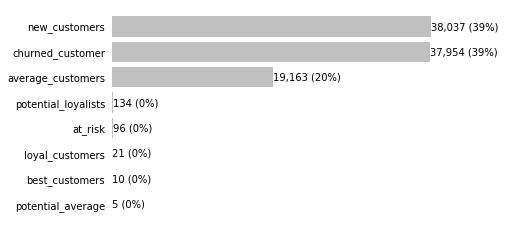

In [33]:
# let's count the number of users in each segment
segments_counts = RFM_customers['Segment'].value_counts().sort_values(ascending=True)
#visualization of the number of users by type
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

### What conclusions can be drawn:
 1. 39% of new customers - you can try to keep them, for example (promo codes / discounts)
2. 39% of customers who have flowed away, quite a lot, but most likely depends on the specifics of the store, because about 95% made just one purchase
 3. 20% of Good customers (loyal_customers,best_customers,average_customers) need to be retained, with a focus on best_customers and loyal_customers - you can enter a loyalty program where the best conditions go to the best customers (best_customers -> loyal_customers -> average_customers)
 4. Potentially good customers (potential_average and potential_loyalists) need to hint about themselves by mailing either with a promo code or information about new functionality / vendor / loyalty program / products/ discounts /sales